In [22]:
import os
os.environ['KAGGLE_USERNAME'] = "&&&&&&&" # username from the json file
os.environ['KAGGLE_KEY'] = "&&&&&&&&&&&&&&&" # key from the json file
!kaggle datasets download -d datafiniti/consumer-reviews-of-amazon-products

consumer-reviews-of-amazon-products.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [23]:
# Unzipping the files

import zipfile

with zipfile.ZipFile("/content/consumer-reviews-of-amazon-products.zip") as z:
    z.extractall(".")

In [56]:
import pandas as pd
df = pd.read_csv('1429_1.csv', encoding='utf-8', header=0)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


***This dataset doesn't have a target column. We create one artificially by assuming reviews with score less than 3 will be negative and the rest is positive. ***

In [57]:
def polarity(x):
    if x < 3:
        return 0
    else:
        return 1
df["reviews.rating"] = df["reviews.rating"].map(polarity) #Map all the scores as the function polarity i.e. positive or negative
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,1,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


# **Data class imbalance:**

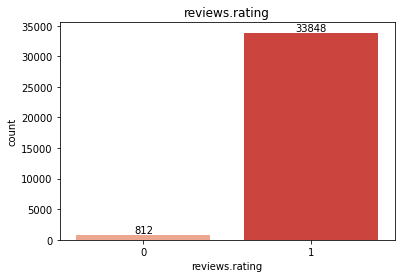

In [26]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df["reviews.rating"], y = None, palette = "Reds")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.title('reviews.rating')
plt.show()

In [81]:
df[["reviews.text","reviews.rating"]].isnull().sum()

reviews.text      1
reviews.rating    0
dtype: int64

In [82]:
df[["reviews.text","reviews.rating"]].dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
from sklearn.utils import shuffle, resample

# Let's copy our dataframe so that we can use it clean for the upsampling example later.
df2 = df[["reviews.text","reviews.rating"]]

# Let's seperate our data into two based on the Score (True of False). 
df_negative = df2[df2["reviews.rating"] == 0]
df_positive = df2[df2["reviews.rating"] == 1]

print("Number of records before upsampling: ")
print("1:", len(df_positive), "0:", len(df_negative))

Number of records before upsampling: 
1: 33848 0: 812


In [84]:
# Let's use the resample function for upsampling.
df_negative = resample(df_negative, replace=True, n_samples=len(df_positive))

# Let's put the separated data frames together. 
df2 = pd.concat([df_negative, df_positive], axis=0)

# Let's shuffle the data
df2 = shuffle(df2)

print("Number of records after upsampling: ")
print("Positive:", len(df2[df2["reviews.rating"] == 1]), "Negative:", len(df2[df2["reviews.rating"] == 0]))

Number of records after upsampling: 
Positive: 33848 Negative: 33848


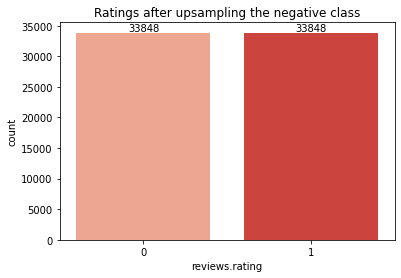

In [44]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df2["reviews.rating"], y = None, palette = "Reds")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.title('Ratings after upsampling the negative class')
plt.show()

In [40]:
df2.to_csv('check.csv', index=False)

# **Exploratory Analysis and Preprocessing**

In [60]:
df2

,reviews.text,reviews.rating
19705,This is a great tablet and I love using it.it ...,1
31185,"Love it, great for intertainment and I would r...",1
13258,Gave as a Christmas gift. Recently learned tha...,0
10026,"Bought this for our daughter to use, but nothi...",0
32746,"Great interface, 4K and below output. It is we...",1
...,...,...
29649,Great addition to the family room. Movies on d...,1
9115,I would never buy another Amazon product perso...,0
13539,It is tough to use these tablets if you are us...,0
2666,"You get what you pay for... This is not great,...",0


In [45]:
# Let's see how many nan values in our data frame
print(df2.isna().sum())

reviews.text      1
reviews.rating    0
dtype: int64


In [86]:
df2.dropna(inplace=True)

In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67695 entries, 22408 to 2174
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.text    67695 non-null  object
 1   reviews.rating  67695 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


*Let's split our data into training and validation subsets.*

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df2[["reviews.text"]], df2["reviews.rating"].values, test_size=0.15, shuffle=True)

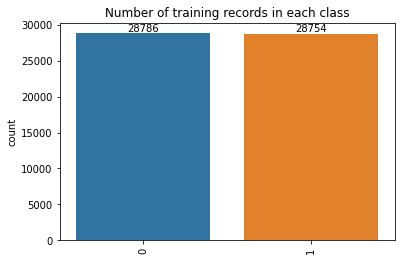

In [89]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=y_train, y = None)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.xticks(rotation=90)
plt.title('Number of training records in each class')
plt.show()

*Let's pre-process the data. We will remove stopwords and apply stemming*

In [90]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt', download_dir='/tmp/')
nltk.download('stopwords', download_dir='/tmp/')
nltk.data.path.append("tmp")

snow = SnowballStemmer('english') 
stop = stopwords.words('english')

#excluding some useful words from stop words list
excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
            "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
            
stop_words = [words for words in stop if words not in excluding]

def process_text(texts): 
    final_text_list=[]
    for sent in texts:
        filtered_sentence=[]
        sent = sent.lower()
        for w in word_tokenize(sent):
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        str1 = " ".join(filtered_sentence) #final string of cleaned words

        final_text_list.append(str1)
    return final_text_list

[nltk_data] Downloading package punkt to /tmp/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /tmp/...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
X_train

,reviews.text
13545,I bought 5 of these for the kids for Christmas...
30992,I tried this out for a few weeks and it does n...
3068,Dont have option for password ask you before b...
13524,"Not much need for this thing, good price, but ..."
24372,Alexa is a fun little assistant and the beginn...
...,...
28355,Bought it for my mother. She works at a beauty...
32368,It locked up on installing kodi and it wouldn'...
9307,There is not enough battery life to read comfo...
31387,"I use this not just for amazon prime, but I lo..."


In [36]:
X_val

,reviews.text
16762,I bought this Kindle for my 7 year old grand-d...
10797,"The price may be attractive, but not worth to ..."
12177,This is my son's and he loves it. It has nice ...
33669,No words can explain what im viewing. I can no...
4501,This tablet has little cpu power and is really...
...,...
17076,This product is not user friendly much less ki...
26138,I would say about 50% of the questions you ask...
13399,Nice tab for young kids getting use to using T...
27442,Had all kinds of problems in registering it an...


In [91]:
print("Pre-process training dataset")
X_train_text_processed = process_text(X_train["reviews.text"].values)

print("Pre-process validation dataset")
X_val_text_processed = process_text(X_val["reviews.text"].values)

Pre-process training dataset
Pre-process validation dataset


# **Feature Extraction**

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

#Text -> Uni gram count Vectors
tf_vectorizer = CountVectorizer(max_features=9500, ngram_range=(1, 2)) 
tf_vectorizer.fit(X_train_text_processed)
X_train = tf_vectorizer.transform(X_train_text_processed)
print("Training Data Size: ", X_train.shape)

X_val = tf_vectorizer.transform(X_val_text_processed)
print("Validation Data Size: ", X_val.shape)

Training Data Size:  (57540, 9500)
Validation Data Size:  (10155, 9500)


# **Naive Bayes**

In [93]:
#Training the model and Testing Accuracy on Validation data
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train.toarray(), y_train)

y_val_pred = nb.predict(X_val.toarray())

print(classification_report(y_val, y_val_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5062
           1       0.90      0.96      0.93      5093

    accuracy                           0.93     10155
   macro avg       0.93      0.93      0.93     10155
weighted avg       0.93      0.93      0.93     10155



# **Confusion matrix**

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_val_pred)

array([[4545,  517],
       [ 221, 4872]])

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk

In [96]:
# quoting = 3 will ignore double quotes
dataset = pd.read_csv('https://raw.githubusercontent.com/futurexskill/ai/master/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [97]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [98]:
# Sample sentence
dataset['Review'][0]

'Wow... Loved this place.'

In [99]:
# Sample sentence
dataset['Review'][6]

"Honeslty it didn't taste THAT fresh.)"

# **Import Stop Words**

In [100]:
from nltk.corpus import stopwords


# **Import Stemmer Class**

In [101]:
from nltk.stem.porter import PorterStemmer

In [102]:
ps = PorterStemmer()

# **Create a Corpus of clean text**

In [105]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [106]:
corpus[0]

'wow love place'

In [107]:
corpus[6]

'honeslti tast fresh'

# **Create the Tf-Idf model for all reviews**

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 1500, min_df = 3, max_df = 0.6)

In [109]:
X = vectorizer.fit_transform(corpus).toarray()

In [110]:
# TF-IDF vector for sample sentences
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [111]:
y = dataset.iloc[:, 1].values


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# **Build a KNN Classifier**

In [113]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
# minkowski is for ecledian distance
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# **Build a Naive Bayes Classifier**

In [114]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#classifier = GaussianNB()
classifierNB = MultinomialNB()
classifierNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# **Evaluate both the models**

In [115]:
y_pred_knn = classifierKNN.predict(X_test)


In [116]:
y_pred_NB = classifierNB.predict(X_test)


In [117]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix


In [118]:
cmknn = confusion_matrix(y_test, y_pred_knn)
cmknn

array([[87, 10],
       [74, 29]])

In [119]:
cmNB = confusion_matrix(y_test, y_pred_NB)
cmNB

array([[75, 22],
       [23, 80]])

In [120]:
print("KNN accuracy \n", accuracy_score(y_test,y_pred_knn))


KNN accuracy 
 0.58


In [121]:
print("Naive Bayes accuracy \n", accuracy_score(y_test,y_pred_NB))


Naive Bayes accuracy 
 0.775


***Naive Bayes gives higher accuracy so we will use that to predict output for new data ***
***
***

In [122]:
sample = ["Good batting by England"]

In [123]:
# create the TF-IDF model of the sample sentence
sample = vectorizer.transform(sample).toarray()

In [124]:
#predict the sentiment
sentiment = classifierNB.predict(sample)
if (sentiment==1):
    print("Good Review")
else:
    print("Bad Review")

Good Review


In [125]:
sample2 = ["bad performance by India in the match"]
sample2 = vectorizer.transform(sample2).toarray()
sentiment2 = classifierNB.predict(sample2)
if (sentiment2==1):
    print("Good Review")
else:
    print("Bad Review")

Bad Review


In [126]:
import pickle

In [127]:
with open('classifier.pickle','wb') as file:
    pickle.dump(classifierNB,file)

In [128]:
with open('tfidfmodel.pickle','wb') as file:
    pickle.dump(vectorizer,file)

In [129]:
!ls

1429_1.csv
check.csv
classifier.pickle
consumer-reviews-of-amazon-products.zip
Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv
sample_data
tfidfmodel.pickle
